# Clasificación de vectores de soporte

In [1]:
from sklearn.svm import SVC


In [2]:
import pickle
with open("prestamo.pkl", "rb") as f:
    X_prestamo_entrenamiento, y_prestamo_entrenamiento, X_prestamo_prueba, y_prestamo_prueba = pickle.load(f)

In [3]:
X_prestamo_entrenamiento.shape, y_prestamo_entrenamiento.shape

((2968, 13), (2968,))

In [4]:
X_prestamo_prueba.shape, y_prestamo_prueba.shape

((1273, 13), (1273,))

## Modelo de entrenamiento 

In [36]:
svc_prestamo = SVC(kernel = "rbf",C=1, random_state=0)
svc_prestamo.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)

SVC(C=1, random_state=0)

## Modelo de prueba

In [37]:
prevision = svc_prestamo.predict(X_prestamo_prueba)

In [38]:
prevision

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

In [39]:
y_prestamo_prueba

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

## Comparar el modelo de prueba con el modelo original
##### 0 - Approved       1 - Rejected

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Puntuación de precisión

In [41]:
accuracy_score(prevision,y_prestamo_prueba)

0.9293008641005499

In [42]:
confusion_matrix(prevision,y_prestamo_prueba)

array([[744,  47],
       [ 43, 439]], dtype=int64)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

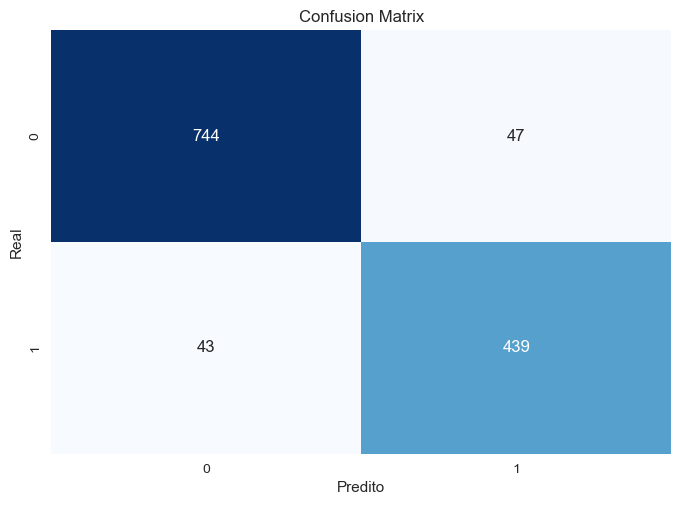

In [44]:
cm = confusion_matrix(prevision,y_prestamo_prueba)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from yellowbrick.classifier import ConfusionMatrix

0.9293008641005499

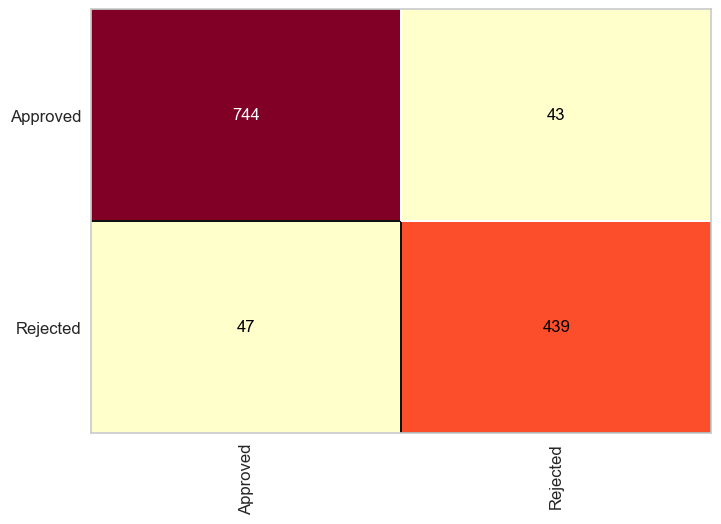

In [46]:
cm = ConfusionMatrix(svc_prestamo)
cm.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)
cm.score(X_prestamo_prueba,y_prestamo_prueba)

In [47]:
print(classification_report(y_prestamo_prueba,prevision))

              precision    recall  f1-score   support

    Approved       0.94      0.95      0.94       787
    Rejected       0.91      0.90      0.91       486

    accuracy                           0.93      1273
   macro avg       0.93      0.92      0.92      1273
weighted avg       0.93      0.93      0.93      1273

